In [31]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir("C:\\Users\\KIIT\\Desktop\\TT Lab\\Untitled Folder")
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout








# Store Data, Labels in the List

In [32]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [33]:
cur_path

'C:\\Users\\KIIT\\Desktop\\TT Lab\\Untitled Folder'

# Preprocess the images

In [34]:
for i in range(classes):
    class_path = os.path.join("C:\\Users\\KIIT\\Desktop\\TT Lab\\Untitled Folder\\Train", str(i))
    images = os.listdir(class_path)
    for a in images:
        try:
            image = Image.open(os.path.join(class_path, a))
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)


# Convert Lists into numpy arrays

In [35]:
data = np.array(data)
labels = np.array(labels)


# Save Labels & Data 


In [36]:
np.save('./train/data',data)
np.save('./train/target',labels)

# Load data & Labels

In [37]:
data=np.load('./train/data.npy')
labels=np.load('./train/target.npy')

In [38]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Onehot encoding

In [41]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Build the model

In [42]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [44]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 169s 169ms/step - loss: 2.1282 - accuracy: 0.4573 - val_loss: 0.7961 - val_accuracy: 0.7677
Epoch 2/20
981/981 [==============================] - 161s 164ms/step - loss: 1.0026 - accuracy: 0.6965 - val_loss: 0.5426 - val_accuracy: 0.8289
Epoch 3/20
981/981 [==============================] - 157s 160ms/step - loss: 0.7585 - accuracy: 0.7645 - val_loss: 0.3890 - val_accuracy: 0.8849
Epoch 4/20
981/981 [==============================] - 165s 168ms/step - loss: 0.6517 - accuracy: 0.7984 - val_loss: 0.3224 - val_accuracy: 0.9036
Epoch 5/20
981/981 [==============================] - 161s 164ms/step - loss: 0.5775 - accuracy: 0.8221 - val_loss: 0.2644 - val_accuracy: 0.9232
Epoch 6/20
981/981 [==============================] - 160s 163ms/step - loss: 0.5404 - accuracy: 0.8324 - val_loss: 0.2343 - val_accuracy: 0.9273
Epoch 7/20
981/981 [==============================] - 161s 164ms/step - loss: 0.5106 - accuracy: 0.8415 - val_loss: 0.2100 -

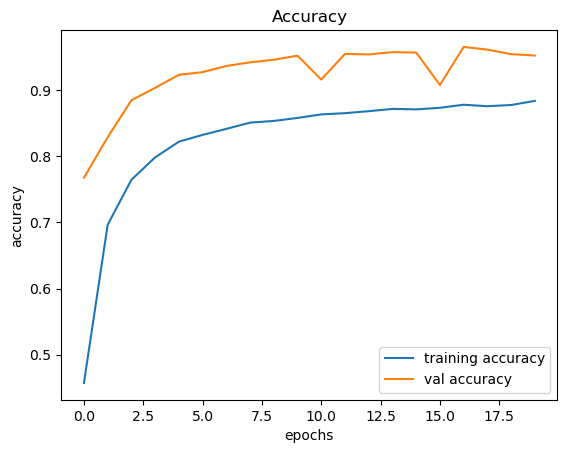

In [45]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

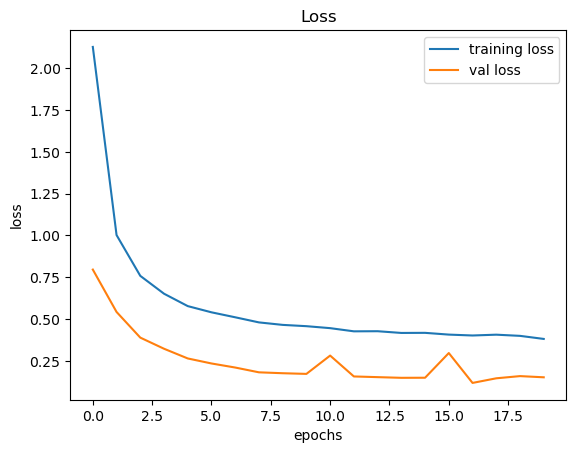

In [46]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing on Test data

In [67]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [68]:
X_test, label = testing("Test.csv")

In [88]:
Y_prob = model.predict(X_test)
Y_pred = np.argmax(Y_prob, axis=1)
Y_pred

395/395 [==============================] - 2s 6ms/step


array([16,  1, 38, ...,  3,  8, 10], dtype=int64)

# Test Data Accuracy

In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))


0.9076009501187648


# Model Saving

In [90]:
model.save("./train/TSR.h5")

# Model Loading

In [91]:
import os
os.chdir("C:\\Users\\KIIT\\Desktop\\TT Lab\\Untitled Folder")
from keras.models import load_model
model = load_model('./train/TSR.h5')

In [92]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [96]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

1/1 [==============================] - 0s 22ms/step
Predicted traffic sign is: Bumpy road


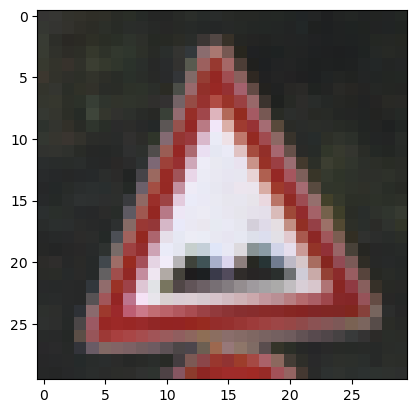

In [104]:
plot, prediction = test_on_img("C:\\Users\\KIIT\\Desktop\\TT Lab\\Untitled Folder\\Test\\00500.png")
rounded_prediction = np.round(prediction).astype(int)
predicted_class = np.argmax(rounded_prediction)
print("Predicted traffic sign is:", classes[predicted_class])
plt.imshow(plot)
plt.show()
